<a href="https://colab.research.google.com/github/sansriti14/terahertz-absorber/blob/main/absorber_ann_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from numpy import asarray
from pandas import read_csv
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

import pickle
import matplotlib.pyplot as plt

In [ ]:
url = '/content/normal_tissue_dataset.csv'
import pandas as pd
from sklearn.model_selection import train_test_split
orig_data = pd.read_csv(url)

dataframe = read_csv(url, header=None)
data = orig_data.copy()
data.shape

x_train, x_test, y_train, y_test = train_test_split(data[data.columns[:-1]],
                                                    data[[data.columns[-1]]],
                                                    test_size = .2,
                                                    random_state = 1)

# scaler = StandardScaler().fit(x_train)
# x_train_scaled = pd.DataFrame(scaler.transform(x_train))
# scaler = StandardScaler().fit(y_train)
# y_train_scaled = pd.DataFrame(scaler.transform(y_train))
x_train

,0.1,0.2,2.1
382,4.2856,0.2,2.1
904,9.9754,0.2,2.1
981,10.8147,0.2,2.1
47,0.6341,0.2,2.1
521,5.8007,0.2,2.1
...,...,...,...
767,8.4821,0.2,2.1
72,0.9066,0.2,2.1
908,10.0190,0.2,2.1
235,2.6833,0.2,2.1


In [ ]:
model = XGBRegressor()
# fit model
model.fit(x_train, y_train)
print(model.predict(x_test))

[0.1774617  0.401969   0.2439932  0.1783924  0.10464968 0.04318196
 0.06231553 0.13499929 0.04200269 0.00181951 0.31525874 0.00842918
 0.8709318  0.07071596 0.04646891 0.00724608 0.0053989  0.00136465
 0.5291882  0.16805    0.26313713 0.18684827 0.5291882  0.17311214
 0.47364795 0.00688869 0.0053989  0.7892068  0.06558555 0.2207106
 0.04784131 0.1580903  0.858669   0.16805    0.9594005  0.04038146
 0.00361454 0.8990822  0.33537042 0.36385322 0.5949298  0.09388246
 0.00410584 0.00527432 0.00527432 0.9678147  0.3623186  0.00150911
 0.2439932  0.41280523 0.25068298 0.00136465 0.401969   0.00136465
 0.00871814 0.2439932  0.05540545 0.25161546 0.16946423 0.28753188
 0.03552926 0.06695306 0.7655529  0.9667403  0.3201639  0.960197
 0.20688519 0.12081122 0.2630605  0.00136465 0.5949298  0.1783924
 0.10464968 0.03687723 0.2439932  0.00271868 0.01196022 0.08848139
 0.05564724 0.03876708 0.10479652 0.858669   0.5710205  0.5710205
 0.03876708 0.5291882  0.20688519 0.9839861  0.08697984 0.2630605
 

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, f1_score, precision_score, make_scorer
Model = []
RMSE = []
R_sq = []
f1 = []
precision = []
cv = KFold(5, random_state = 1,shuffle=True)
def input_scores(name, model, x, y):
    Model.append(name)
    RMSE.append(np.sqrt((-1) * cross_val_score(model, x, y, cv=cv,
                                               scoring='neg_mean_squared_error').mean()))
    R_sq.append(cross_val_score(model, x, y, cv=cv, scoring='r2').mean())
    f1.append(cross_val_score(model, x, y, cv=cv, scoring=make_scorer(f1_score)).mean())
    precision.append(cross_val_score(model, x, y, cv=cv, scoring=make_scorer(precision_score)).mean())

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,
                              AdaBoostRegressor)

names = ['Linear Regression', 'Ridge Regression',
         'K Neighbors Regressor', 'Decision Tree Regressor',
         'Random Forest Regressor', 'Gradient Boosting Regressor',
         'Adaboost Regressor']
models = [LinearRegression(), Ridge(),
          KNeighborsRegressor(), DecisionTreeRegressor(),
          RandomForestRegressor(), GradientBoostingRegressor(),
          AdaBoostRegressor()]

#Running all algorithms
for name, model in zip(names, models):
    input_scores(name, model, x_train, y_train)

evaluation = pd.DataFrame({'Model': Model,
                           'RMSE': RMSE,
                           'R Squared': R_sq,
                           'F1': f1,
                            'precision score': precision})
print("FOLLOWING ARE THE TRAINING SCORES FOR NORMAL TISSUE: ")
print(evaluation)

FOLLOWING ARE THE TRAINING SCORES FOR NORMAL TISSUE: 
                         Model      RMSE  R Squared  F1  precision score
0            Linear Regression  0.266325   0.044490 NaN              NaN
1             Ridge Regression  0.266325   0.044491 NaN              NaN
2        K Neighbors Regressor  0.009972   0.998673 NaN              NaN
3      Decision Tree Regressor  0.011504   0.998201 NaN              NaN
4      Random Forest Regressor  0.007421   0.999275 NaN              NaN
5  Gradient Boosting Regressor  0.015277   0.996882 NaN              NaN
6           Adaboost Regressor  0.147052   0.663200 NaN              NaN


In [ ]:
scaler = StandardScaler().fit(x_test)
x_test_scaled = pd.DataFrame(scaler.transform(x_test))

In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor
HistGradientBoostingRegressor()
from sklearn.model_selection import GridSearchCV
param_grid = {
              'max_depth':[10], #range(5,16,2),
              'learning_rate':[0.2]}
clf = GridSearchCV(HistGradientBoostingRegressor(random_state=1),
                   param_grid = param_grid, scoring='r2',
                   cv=cv).fit(x_train, y_train)
print(clf.best_estimator_)
print("R Squared:",clf.best_score_)

HistGradientBoostingRegressor(learning_rate=0.2, max_depth=10, random_state=1)
R Squared: 0.9946169380222954


In [ ]:
clf = HistGradientBoostingRegressor(random_state=1, max_depth=20,
                                learning_rate=0.2/2)
print("R Squared:",cross_val_score(clf, x_train, y_train, cv=cv, scoring='r2').mean())

R Squared: 0.9927814285931638


In [ ]:
clf = HistGradientBoostingRegressor(learning_rate=0.2/2, max_depth=20,
                                random_state=1).fit(x_train, y_train)
print("Test RMSE: ", np.sqrt(mean_squared_error(y_test, clf.predict(x_test))))
print("Test R^2: ", r2_score(y_test, clf.predict(x_test)))

Test RMSE:  0.016319838658973254
Test R^2:  0.9962063521790935


In [ ]:
url = '/content/normal_tissue_test_dataset.csv'
dataframe = read_csv(url, header=None)
test_normal_tissue = dataframe.copy()
test_normal_tissue.shape
test_actual_normal_tissue = test_normal_tissue.drop(test_normal_tissue.columns[:-1], axis=1)
test_normal_tissue = test_normal_tissue.drop(test_normal_tissue.columns[-1], axis=1)
print(test_actual_normal_tissue)

            3
0    0.001851
1    0.001786
2    0.001725
3    0.001666
4    0.001611
..        ...
995  0.032603
996  0.032493
997  0.032385
998  0.032278
999  0.032173

[1000 rows x 1 columns]


In [ ]:
scaler = StandardScaler().fit(test_normal_tissue)
test_scaled_normal_tissue = pd.DataFrame(scaler.transform(test_normal_tissue))
predicted_normal = clf.predict(test_normal_tissue)
predicted_normal

array([0.0012578 , 0.0012578 , 0.0012578 , 0.0012578 , 0.0012578 ,
       0.0012578 , 0.0012578 , 0.0012578 , 0.0012578 , 0.0012578 ,
       0.0012578 , 0.0012578 , 0.0012578 , 0.0012578 , 0.0012578 ,
       0.0012578 , 0.0012578 , 0.0012578 , 0.0012578 , 0.0012578 ,
       0.0012578 , 0.0012578 , 0.0012578 , 0.0012578 , 0.0012578 ,
       0.0012578 , 0.0012578 , 0.0012578 , 0.0012578 , 0.00117999,
       0.00117999, 0.00117999, 0.00117999, 0.00124174, 0.00124174,
       0.00124174, 0.00124174, 0.00124174, 0.00132896, 0.00132896,
       0.00132896, 0.00145614, 0.00145614, 0.00145614, 0.00145614,
       0.00159581, 0.00159581, 0.00159581, 0.00175822, 0.00175822,
       0.00175822, 0.00175822, 0.00175822, 0.00198038, 0.00198038,
       0.00198038, 0.00220645, 0.00220645, 0.00220645, 0.00220645,
       0.00220645, 0.00248797, 0.00248797, 0.00248797, 0.00248797,
       0.0027773 , 0.0027773 , 0.0027773 , 0.0027773 , 0.00298357,
       0.00298357, 0.00298357, 0.00321415, 0.00321415, 0.00321

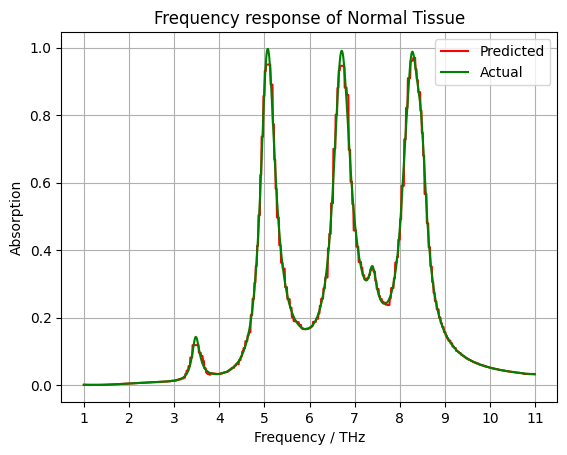

In [ ]:
def graph(predicted):
    plt.title("Frequency response of Normal Tissue")
    plt.plot(predicted_normal,color = 'red', label = 'Predicted')
    plt.plot(test_actual_normal_tissue, color = 'green', label = 'Actual')
    x = [0,100,200,300,400,500,600,700,800,900,1000]
    x_labels = [1,2,3,4,5,6,7,8,9,10,11]
    plt.xticks(x, x_labels)
    # plt.plot(y_test[50:60], color = 'green', label = 'Actual')
    plt.grid(alpha = 1)
    plt.xlabel('Frequency / THz')
    plt.ylabel('Absorption')
    plt.legend()
    plt.show()
    plt.rcParams.update({'font.size': 10})
graph(predicted = predicted_normal)

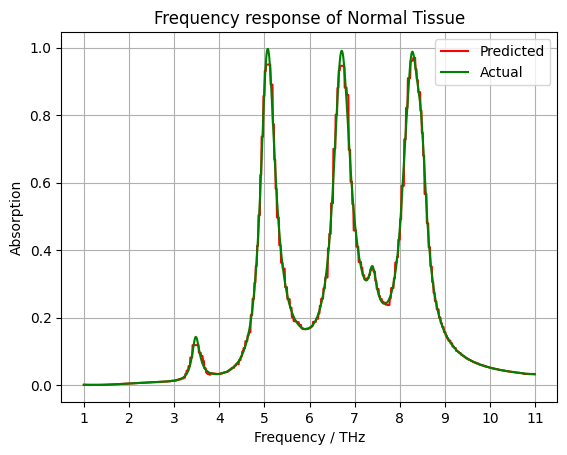

In [ ]:
models[0].fit(x_train,y_train)
linear_regression = models[0].predict(test_normal_tissue)
graph(linear_regression)

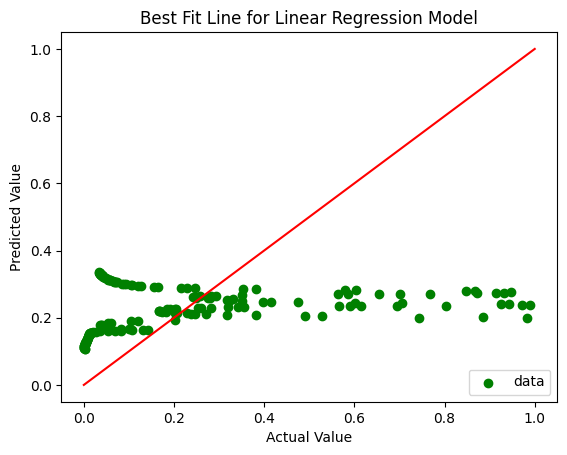

In [ ]:
prediction_linear = models[0].predict(x_test)
plt.scatter(y_test[30:500],prediction_linear[30:500],color='green',label='data')
plt.plot((0,1),color="red")
plt.legend(loc=4)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Best Fit Line for Linear Regression Model')
plt.show()

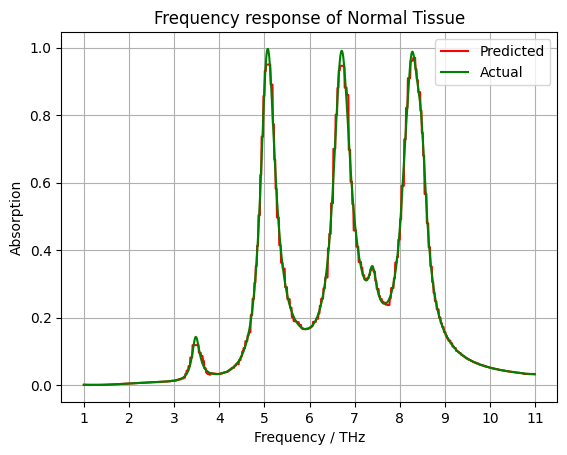

In [ ]:
models[1].fit(x_train,y_train)
ridge_regression = models[1].predict(test_normal_tissue)
graph(ridge_regression)

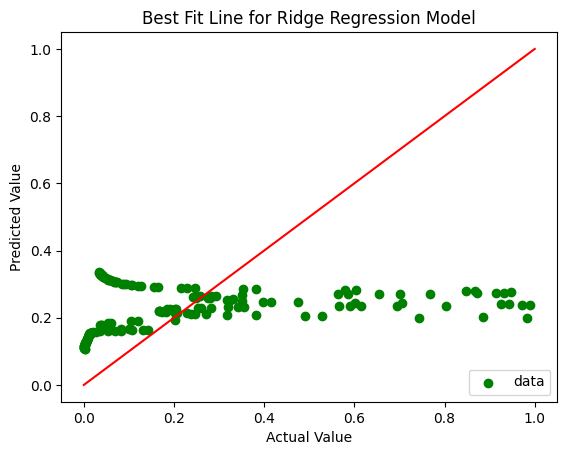

In [ ]:
prediction_ridge = models[1].predict(x_test)
plt.scatter(y_test[30:500],prediction_ridge[30:500],color='green',label='data')
plt.plot((0,1),color="red")
plt.legend(loc=4)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Best Fit Line for Ridge Regression Model')
plt.show()

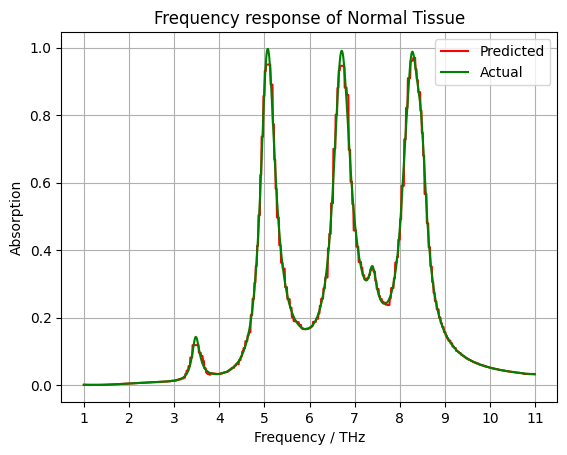

In [ ]:
models[2].fit(x_train,y_train)
kneighbors_regression = models[2].predict(test_normal_tissue)
graph(kneighbors_regression)

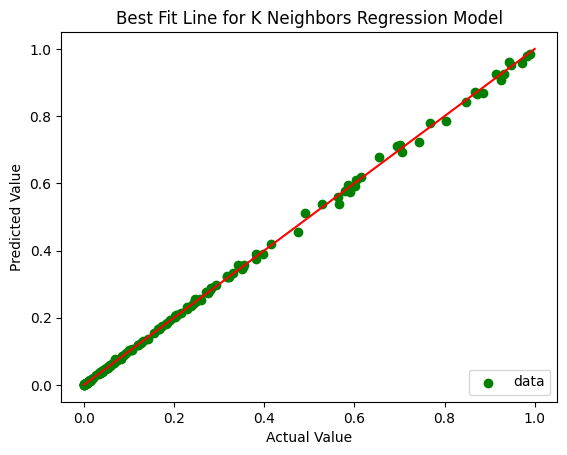

In [ ]:
prediction_kneighbors = models[2].predict(x_test)
plt.scatter(y_test[30:500],prediction_kneighbors[30:500],color='green',label='data')
plt.plot((0,1),color="red")
plt.legend(loc=4)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Best Fit Line for K Neighbors Regression Model')
plt.show()

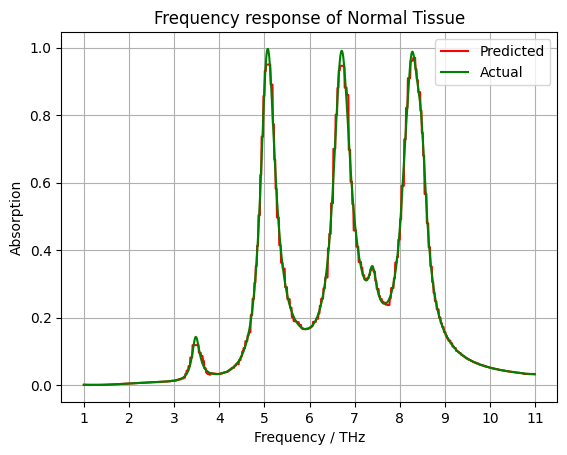

In [ ]:
models[3].fit(x_train,y_train)
decision_tree_regression = models[3].predict(test_normal_tissue)
graph(decision_tree_regression)

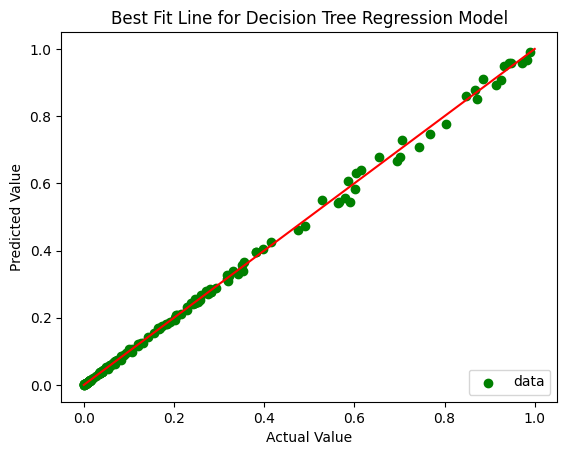

In [ ]:
prediction_decision_tree = models[3].predict(x_test)
plt.scatter(y_test[30:500],prediction_decision_tree[30:500],color='green',label='data')
plt.plot((0,1),color="red")
plt.legend(loc=4)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Best Fit Line for Decision Tree Regression Model')
plt.show()

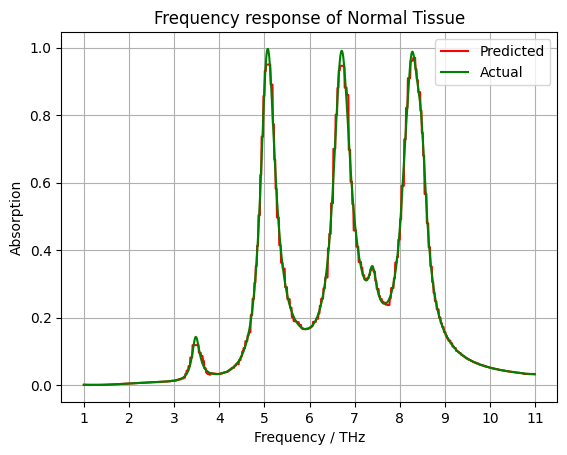

In [ ]:
models[4].fit(x_train,y_train)
random_forest_regression = models[4].predict(test_normal_tissue)
graph(random_forest_regression)

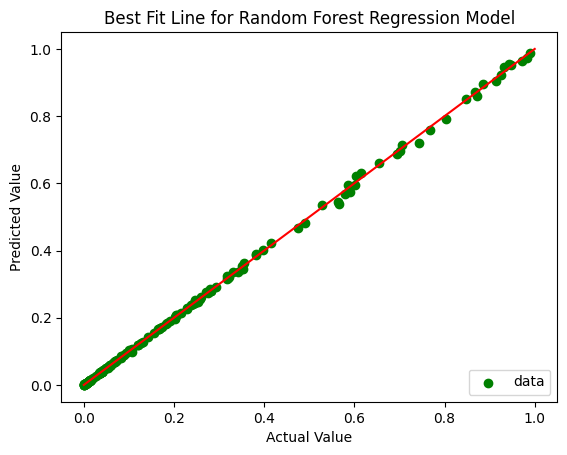

In [ ]:
prediction_random_forest = models[4].predict(x_test)
plt.scatter(y_test[30:500],prediction_random_forest[30:500],color='green',label='data')
plt.plot((0,1),color="red")
plt.legend(loc=4)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Best Fit Line for Random Forest Regression Model')
plt.show()

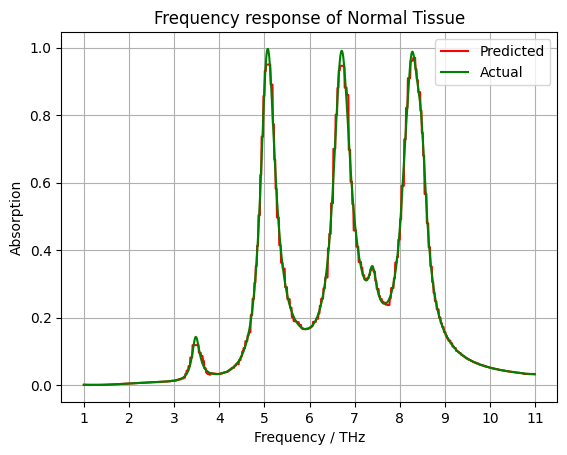

In [ ]:
models[5].fit(x_train,y_train)
gradient_boosting_regression = models[5].predict(test_normal_tissue)
graph(gradient_boosting_regression)

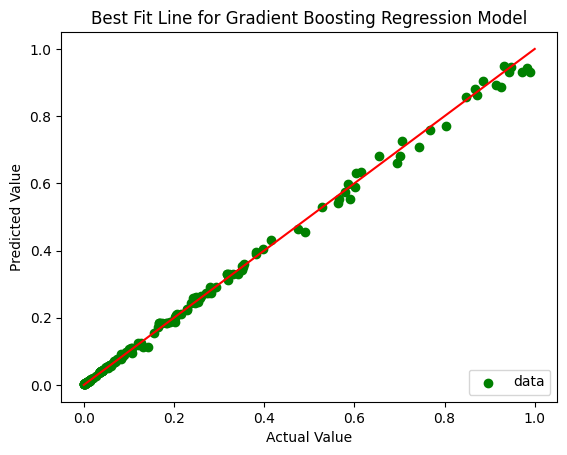

In [ ]:
prediction_gradient_boosting = models[5].predict(x_test)
plt.scatter(y_test[30:500],prediction_gradient_boosting[30:500],color='green',label='data')
plt.plot((0,1),color="red")
plt.legend(loc=4)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Best Fit Line for Gradient Boosting Regression Model')
plt.show()

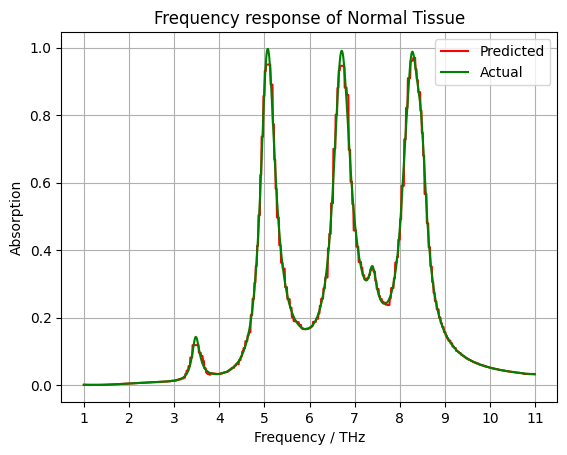

In [ ]:
models[5].fit(x_train,y_train)
adaboost_regression = models[5].predict(test_normal_tissue)
graph(adaboost_regression)

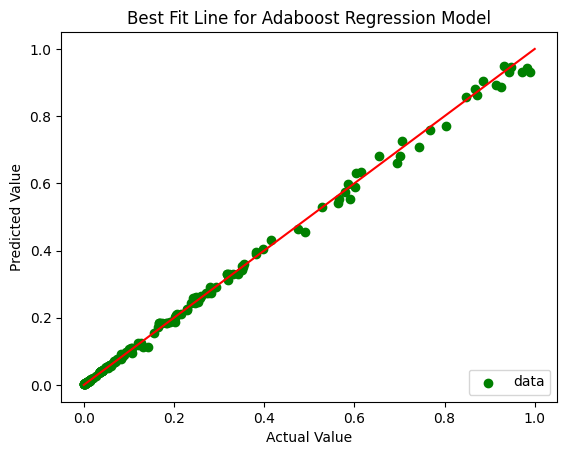

In [ ]:
prediction_adaboost = models[5].predict(x_test)
plt.scatter(y_test[30:500],prediction_adaboost[30:500],color='green',label='data')
plt.plot((0,1),color="red")
plt.legend(loc=4)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Best Fit Line for Adaboost Regression Model')
plt.show()

In [ ]:
url = '/content/breast_cancer_dataset.csv'
#import pandas as pd
#from sklearn.model_selection import train_test_split
orig_data = pd.read_csv(url)

dataframe = read_csv(url, header=None)
data = orig_data.copy()
data.shape

x_train, x_test, y_train, y_test = train_test_split(data[data.columns[:-1]],
                                                    data[[data.columns[-1]]],
                                                    test_size = .2,
                                                    random_state = 1)

# scaler = StandardScaler().fit(x_train)
# x_train_scaled = pd.DataFrame(scaler.transform(x_train))
# scaler = StandardScaler().fit(y_train)
# y_train_scaled = pd.DataFrame(scaler.transform(y_train))
x_train

,0.1,2.5
5,0.1654,2.5
464,4.7543,2.5
248,2.6506,2.5
790,8.1115,2.5
493,5.0377,2.5
...,...,...
847,8.6892,2.5
715,7.2940,2.5
905,9.2778,2.5
235,2.5198,2.5


In [ ]:
model = XGBRegressor()
# fit model
model.fit(x_train, y_train)
print(model.predict(x_test))

[0.00684636 0.2342     0.00618305 0.04458997 0.2895615  0.03437045
 0.0098479  0.00684636 0.00520553 0.00618305 0.04458997 0.01277494
 0.00474893 0.00520553 0.7315931  0.39951277 0.1421653  0.20005831
 0.08523933 0.3513454  0.0098479  0.30250475 0.90735227 0.03437045
 0.93297327 0.03980472 0.3742555  0.00550187 0.06108034 0.01277494
 0.00437787 0.3077843  0.00618305 0.9484772  0.5386304  0.20394693
 0.03240008 0.27516472 0.1833702  0.10137139 0.00693285 0.03437045
 0.00474893 0.00550187 0.05924354 0.00550187 0.01033931 0.20394693
 0.97591376 0.3054428  0.03955713 0.13140237 0.25016734 0.18895161
 0.1953041  0.02087362 0.00437787 0.00825449 0.05881568 0.04847452
 0.90399015 0.00618305 0.01277494 0.01033931 0.3742555  0.02087362
 0.03980472 0.5209782  0.01277494 0.3513454  0.00825449 0.00550187
 0.05029683 0.03955713 0.03437045 0.30250475 0.00618305 0.3054428
 0.97591376 0.0053727  0.863862   0.00797733 0.03437045 0.1195922
 0.48846498 0.5386304  0.00286983 0.90735227 0.18895161 0.061668

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, f1_score, precision_score, make_scorer
Model = []
RMSE = []
R_sq = []
f1 = []
precision = []
cv = KFold(5, random_state = 1,shuffle=True)
def input_scores(name, model, x, y):
    Model.append(name)
    RMSE.append(np.sqrt((-1) * cross_val_score(model, x, y, cv=cv,
                                               scoring='neg_mean_squared_error').mean()))
    R_sq.append(cross_val_score(model, x, y, cv=cv, scoring='r2').mean())
    f1.append(cross_val_score(model, x, y, cv=cv, scoring=make_scorer(f1_score)).mean())
    precision.append(cross_val_score(model, x, y, cv=cv, scoring=make_scorer(precision_score)).mean())

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,
                              AdaBoostRegressor)

names = ['Linear Regression', 'Ridge Regression',
         'K Neighbors Regressor', 'Decision Tree Regressor',
         'Random Forest Regressor', 'Gradient Boosting Regressor',
         'Adaboost Regressor']
models = [LinearRegression(), Ridge(),
          KNeighborsRegressor(), DecisionTreeRegressor(),
          RandomForestRegressor(), GradientBoostingRegressor(),
          AdaBoostRegressor()]

#Running all algorithms
for name, model in zip(names, models):
    input_scores(name, model, x_train, y_train)

evaluation = pd.DataFrame({'Model': Model,
                           'RMSE': RMSE,
                           'R Squared': R_sq,
                           'F1': f1,
                            'precision score': precision})
print("FOLLOWING ARE THE TRAINING SCORES: ")
print(evaluation)

FOLLOWING ARE THE TRAINING SCORES: 
                         Model      RMSE  R Squared  F1  precision score
0            Linear Regression  0.271911   0.023852 NaN              NaN
1             Ridge Regression  0.271911   0.023852 NaN              NaN
2        K Neighbors Regressor  0.008904   0.998952 NaN              NaN
3      Decision Tree Regressor  0.010515   0.998528 NaN              NaN
4      Random Forest Regressor  0.007173   0.999286 NaN              NaN
5  Gradient Boosting Regressor  0.015802   0.996713 NaN              NaN
6           Adaboost Regressor  0.136720   0.729201 NaN              NaN


In [ ]:
scaler = StandardScaler().fit(x_test)
x_test_scaled = pd.DataFrame(scaler.transform(x_test))

In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor
HistGradientBoostingRegressor()
from sklearn.model_selection import GridSearchCV
param_grid = {
              'max_depth':[10], #range(5,16,2),
              'learning_rate':[0.2]}
clf = GridSearchCV(HistGradientBoostingRegressor(random_state=1),
                   param_grid = param_grid, scoring='r2',
                   cv=cv).fit(x_train, y_train)
print(clf.best_estimator_)
print("R Squared:",clf.best_score_)

HistGradientBoostingRegressor(learning_rate=0.2, max_depth=10, random_state=1)
R Squared: 0.9956913794436693


In [ ]:
clf = HistGradientBoostingRegressor(random_state=1, max_depth=20,
                                learning_rate=0.2/2)
print("R Squared:",cross_val_score(clf, x_train, y_train, cv=cv, scoring='r2').mean())

R Squared: 0.9945224842661883


In [ ]:
clf = HistGradientBoostingRegressor(learning_rate=0.2/2, max_depth=20,
                                random_state=1).fit(x_train, y_train)
print("Test RMSE: ", np.sqrt(mean_squared_error(y_test, clf.predict(x_test))))
print("Test R^2: ", r2_score(y_test, clf.predict(x_test)))

Test RMSE:  0.013966961899192581
Test R^2:  0.997546321597864


In [ ]:
url = '/content/breast_cancer_test_dataset.csv'
dataframe = read_csv(url, header=None)
test_cancer_tissue = dataframe.copy()
test_cancer_tissue.shape
test_actual_cancer_tissue = test_cancer_tissue.drop(test_cancer_tissue.columns[:-1], axis=1)
test_cancer_tissue = test_cancer_tissue.drop(test_cancer_tissue.columns[-1], axis=1)
print(test_actual_cancer_tissue)

             2
0     0.001851
1     0.002024
2     0.002188
3     0.002343
4     0.002489
...        ...
1068  0.031904
1069  0.031945
1070  0.031994
1071  0.032052
1072  0.032118

[1073 rows x 1 columns]


In [ ]:
scaler = StandardScaler().fit(test_cancer_tissue)
test_scaled_cancer_tissue = pd.DataFrame(scaler.transform(test_cancer_tissue))
predicted_cancer_tissue = clf.predict(test_cancer_tissue)
predicted_cancer_tissue

array([0.00344574, 0.00344574, 0.00344574, ..., 0.03207649, 0.03207649,
       0.03207649])

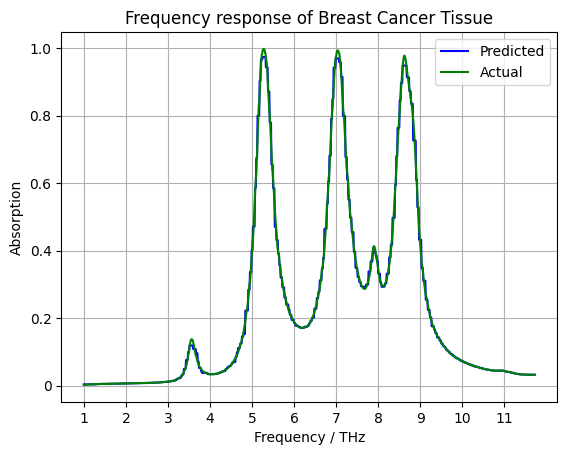

In [ ]:
def graph(predicted):
    plt.title("Frequency response of Breast Cancer Tissue")
    plt.plot(predicted_cancer_tissue,color = 'blue', label = 'Predicted')
    plt.plot(test_actual_cancer_tissue, color = 'green', label = 'Actual')
    x = [0,100,200,300,400,500,600,700,800,900,1000]
    y = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
    x_labels = [1,2,3,4,5,6,7,8,9,10,11]
    y_labels = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
    plt.xticks(x, x_labels)
    plt.yticks(y, y_labels)
    # plt.plot(y_test[50:60], color = 'green', label = 'Actual')
    plt.grid(alpha = 1)
    plt.xlabel('Frequency / THz')
    plt.ylabel('Absorption')
    plt.legend()
    plt.show()
    plt.rcParams.update({'font.size': 10})
graph(predicted = predicted_cancer_tissue)

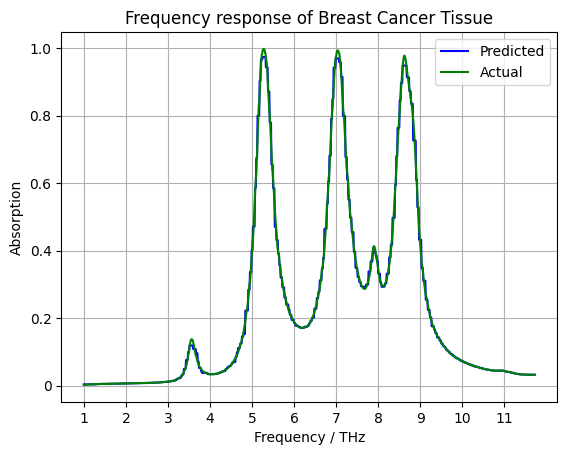

In [ ]:
models[4].fit(x_train,y_train)
pred = models[4].predict(test_cancer_tissue)
graph(pred)

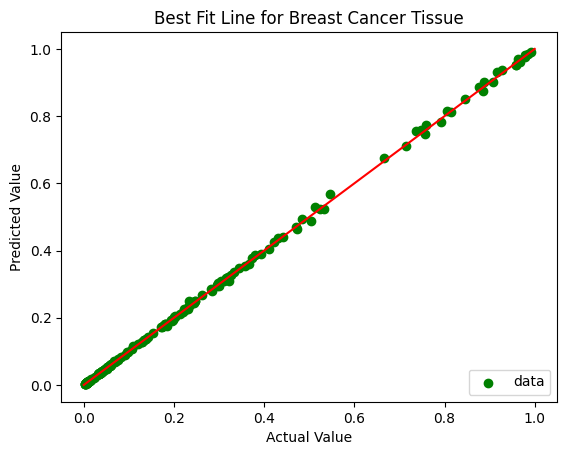

In [ ]:
prediction = models[4].predict(x_test)
plt.scatter(y_test[30:500],prediction[30:500],color='green',label='data')
plt.plot((0,1),color="red")
plt.legend(loc=4)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Best Fit Line for Breast Cancer Tissue')
plt.show()

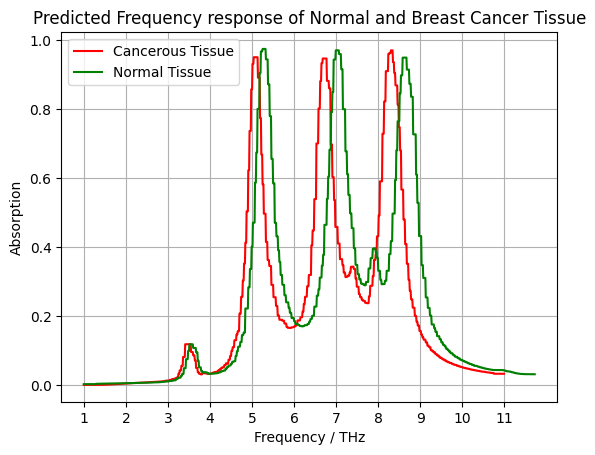

In [ ]:
def graph(comparison):
    plt.title("Predicted Frequency response of Normal and Breast Cancer Tissue")
    plt.plot(predicted_normal,color = 'red', label = 'Cancerous Tissue')
    plt.plot(predicted_cancer_tissue, color = 'green', label = 'Normal Tissue')
    x = [0,100,200,300,400,500,600,700,800,900,1000]
    y = [100]
    labels = [1,2,3,4,5,6,7,8,9,10,11]
    plt.xticks(x, labels)
    # plt.plot(y_test[50:60], color = 'green', label = 'Actual')
    plt.grid(alpha = 1)
    plt.xlabel('Frequency / THz')
    plt.ylabel('Absorption')
    plt.legend()
    plt.show()
    plt.rcParams.update({'font.size': 6})
graph(comparison = predicted_normal)

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("Hybrid_data.csv")
df.head()

,0.1,0.001850528,0
0,0.1109,0.001786,0
1,0.1218,0.001725,0
2,0.1327,0.001666,0
3,0.2090,0.001341,0
4,0.2199,0.001306,0


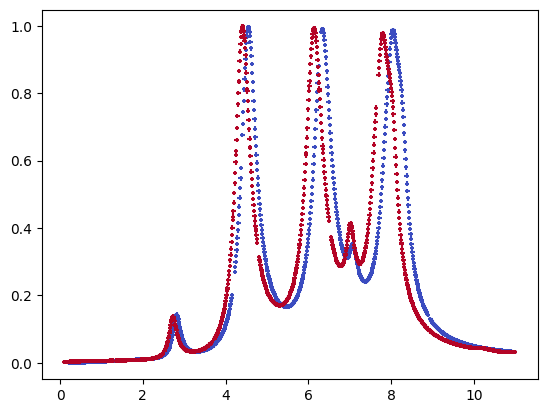

In [ ]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df.iloc[:, 2], cmap='coolwarm', marker='+', s=10)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], train_size=0.8)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_predicted = model.predict(X_test)
model.predict_proba(X_test)

In [ ]:
model.score(X_test,y_test)

0.48009950248756217

In [ ]:
y_predicted

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [ ]:
def prediction_function(frequency, absorption_coefficient):
    z = -0.0135 * frequency + 0.1225 * absorption_coefficient + 0.1359
    y = sigmoid(z)
    return y

In [ ]:
frequency = 10.6839	#normal
absorption_coefficient = 0.032740018
prediction_function(frequency, absorption_coefficient)

0.4989195022331942

In [ ]:
frequency = 0.1109 #cancerous
absorption_coefficient = 0.001786
prediction_function(frequency, absorption_coefficient)

0.5336046726590543

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_predicted)
print("Accuracy:", accuracy)

Accuracy: 0.48009950248756217


**Decision Tree Classifier**

In [3]:
df = pd.read_csv("Hybrid_data.csv")
df.head()

,0.1,0.001850528,0
0,0.1109,0.001786,0
1,0.1218,0.001725,0
2,0.1327,0.001666,0
3,0.2090,0.001341,0
4,0.2199,0.001306,0


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.2, random_state=42)

In [5]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [6]:
class_labels = {0: "Class 0: Normal", 1: "Class 1: Cancerous"}

y_predicted = model.predict(X_test)
y_predicted_labels = [class_labels[label] for label in y_predicted]

In [ ]:
model.predict_proba(X_test)

In [8]:
model.score(X_test,y_test)

0.8258706467661692

In [ ]:
y_predicted

In [ ]:
X_test

,0.1,0.001850528
1960,10.5095,0.035529
526,6.0514,0.443721
393,4.6017,0.952471
1402,4.6126,0.590411
433,5.0377,0.258923
...,...,...
938,10.6839,0.035890
1326,3.9150,0.129696
1138,1.9639,0.009348
1037,0.8085,0.005443


In [10]:
model.predict([[0.1981,0.001379]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [11]:
model.predict([[3.6861, 0.064286]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [12]:
def predict_class(frequency, absorption_coefficient):
    predicted_class = model.predict([[frequency, absorption_coefficient]])[0]

    class_labels = {0: "Class 0: Normal", 1: "Class 1: Cancerous"}

    predicted_label = class_labels[predicted_class]

    print(predicted_label)

In [13]:
predict_class(3.6861, 0.064286)

Class 1: Cancerous


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [14]:
predict_class(0.1981,0.001379)

Class 0: Normal


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [15]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_predicted)
print("Accuracy:", accuracy)

Accuracy: 0.8258706467661692


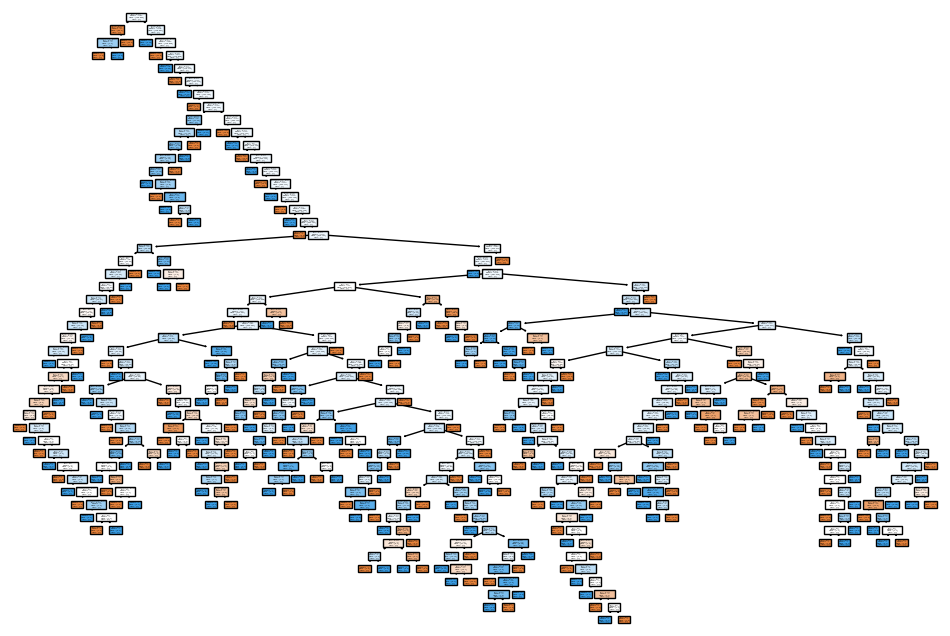

In [ ]:
plt.figure(figsize=(12, 8))
tree.plot_tree(model, filled=True, feature_names=df.columns[:-1], class_names=True)
plt.show()

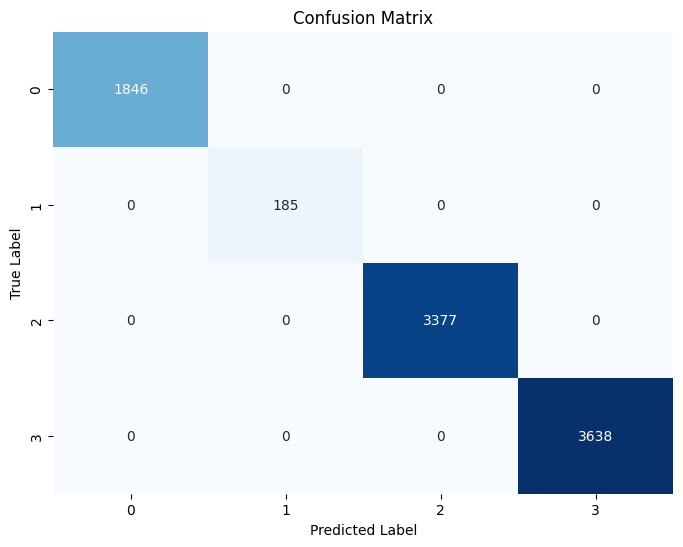

In [85]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(X_test)

conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

**Mulit-class classification using Decision Tree Classifier**

In [213]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

df = pd.read_csv("Chal_ja_bhai_🤞.csv")
df.head()

,0.1,0.001851475,3.39,0
0,0.1109,0.001971,3.39,0
1,0.1218,0.002088,3.39,0
2,0.1327,0.002202,3.39,0
3,0.1436,0.002313,3.39,0
4,0.1545,0.002422,3.39,0


In [214]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.2, random_state=42)

In [215]:
from sklearn import tree
model1 = tree.DecisionTreeClassifier()
model1.fit(X_train, y_train)

DecisionTreeClassifier()

In [216]:
def predict_class(frequency, absorption_coefficient, permittivity):
    predicted_class = model1.predict([[frequency, absorption_coefficient, permittivity]])[0]

    class_labels = {0: "Class 0: Normal", 1: "Class 1: Skin Cancer", 2: "Class 2: Breast Cancer", 3: "Class 3: Gastric Cancer"}

    predicted_label = class_labels[predicted_class]

    print(predicted_label)

In [217]:
from sklearn.metrics import accuracy_score

y_pred = model1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 1.0


In [224]:
predict_class(8.0134,0.19090807800906,3.395)

Class 0: Normal


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


**Gradient Boosting Classifier**

In [226]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

df = pd.read_csv("MultiClass_dataset.csv")
df.head()

,0.1,0.001851475,3.39,0
0,0.1109,0.001971,3.39,0
1,0.1218,0.002088,3.39,0
2,0.1327,0.002202,3.39,0
3,0.1436,0.002313,3.39,0
4,0.1545,0.002422,3.39,0


In [227]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.2, random_state=42)

model = GradientBoostingClassifier()
model.fit(X_train, y_train)

GradientBoostingClassifier()

In [189]:
def predict_class(frequency, absorption_coefficient, permittivity):
    predicted_class = model.predict([[frequency, absorption_coefficient, permittivity]])[0]

    class_labels = {0: "Class 0: Normal", 1: "Class 1: Skin Cancer", 2: "Class 2: Breast Cancer", 3: "Class 3: Gastric Cancer"}

    predicted_label = class_labels[predicted_class]

    print(predicted_label)

In [220]:
model.predict_proba(X_test)

array([[7.56440089e-08, 9.46432920e-09, 1.25676996e-07, 9.99999789e-01],
       [9.99999694e-01, 1.10992480e-08, 1.44472571e-07, 1.50838438e-07],
       [7.71514055e-08, 9.66641148e-09, 9.99999779e-01, 1.33792832e-07],
       ...,
       [7.71514055e-08, 9.66641148e-09, 9.99999779e-01, 1.33792832e-07],
       [7.71514055e-08, 9.66641148e-09, 9.99999779e-01, 1.33792832e-07],
       [9.99999694e-01, 1.10992480e-08, 1.44472571e-07, 1.50838438e-07]])

In [221]:
model.score(X_test,y_test)

1.0

In [192]:
y_predicted

array([2, 2, 2, ..., 0, 1, 0])

In [193]:
predict_class(7.1959,0.29210184986819,2.4)

Class 2: Breast Cancer


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [194]:
predict_class(3.99675,0.24099732511531,6.3)

Class 3: Gastric Cancer


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [195]:
predict_class(4.6998,0.182674375,4.2)

Class 1: Skin Cancer


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [222]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy * 100)

Accuracy: 100.0


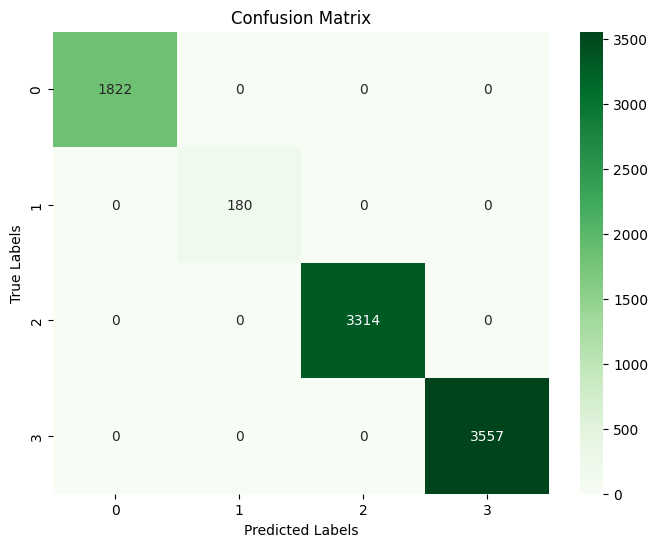

In [223]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Greens', fmt='g',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

**Random Forest Classifier**

In [139]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv("MultiClass_dataset.csv", header=None)

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model2 = RandomForestClassifier()
model2.fit(X_train, y_train)

y_pred = model2.predict(X_test)

In [141]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

boosted_rf_model = AdaBoostClassifier(estimator=rf_model, n_estimators=100, random_state=42, learning_rate = 0.5)

# Train the boosted Random Forest model
boosted_rf_model.fit(X_train, y_train)

# Evaluate the boosted Random Forest model
accuracy = boosted_rf_model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [142]:
def predict_class(frequency, absorption_coefficient, permittivty):
    predicted_class = model2.predict([[frequency, absorption_coefficient, permittivty]])[0]

    class_labels = {0: "Class 0: Normal", 1: "Class 1: Skin Cancer", 2: "Class 2: Breast Cancer", 3: "Class 3: Gastric Cancer"}

    predicted_label = class_labels[predicted_class]

    print(predicted_label)

In [143]:
predict_class(7.1959,0.29210184986819,2.4)

Class 2: Breast Cancer


In [144]:
predict_class(3.99675,0.24099732511531,6.3)

Class 3: Gastric Cancer


In [145]:
predict_class(4.6998,0.182674375,4.2)

Class 1: Skin Cancer


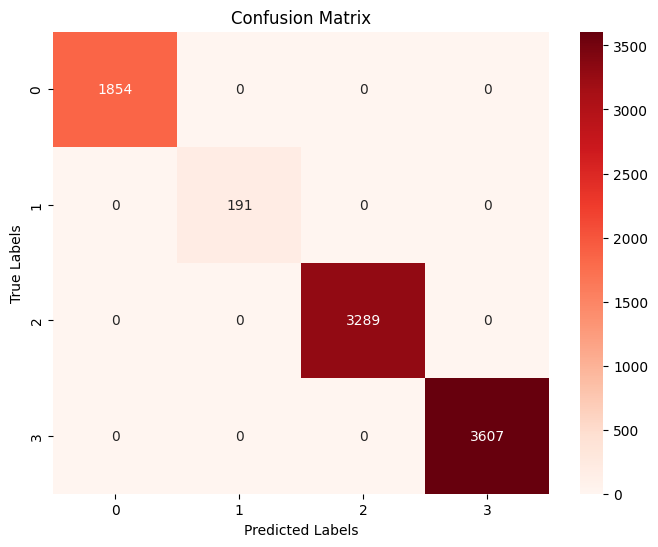

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier()
model2.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model2.predict(X_test)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Reds', fmt='g',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

**Histogram Gradient Boosting Classifier**

In [206]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingClassifier

# Read the dataset
df = pd.read_csv("MultiClass_dataset.csv", header=None)

# Split the dataset into features (X) and the target variable (y)
X = df.iloc[:, :-1]  # Selecting all rows and all columns except the last one for features
y = df.iloc[:, -1]   # Selecting all rows and only the last column for the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the HistGradientBoostingClassifier model
model3 = HistGradientBoostingClassifier()
model3.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model3.predict(X_test)


In [207]:
model3.predict_proba(X_test)

array([[3.72092935e-08, 1.00405247e-08, 9.99999916e-01, 3.69653352e-08],
       [3.90608272e-08, 1.05401410e-08, 9.99999909e-01, 4.16063782e-08],
       [3.72092935e-08, 1.00405247e-08, 9.99999916e-01, 3.69653352e-08],
       ...,
       [9.99999806e-01, 2.31673369e-08, 8.14554966e-08, 8.96723931e-08],
       [7.21732980e-08, 9.99999741e-01, 8.82673674e-08, 9.82358625e-08],
       [9.99999815e-01, 2.22967266e-08, 8.22953707e-08, 8.04912187e-08]])

In [209]:
y_pred

array([2, 2, 2, ..., 0, 1, 0])

In [210]:
X_test

,0,1,2
23719,5.40285,0.179420,2.5750
12241,2.11105,0.011358,2.4250
12784,5.14670,0.184694,2.4250
2746,8.55840,0.090559,3.3950
35729,5.81705,0.450597,6.2500
...,...,...,...
9887,10.62940,0.035478,4.2000
4968,0.21990,0.001946,3.4025
831,9.27780,0.056493,3.3900
9141,2.30180,0.053399,4.2000


In [211]:
from sklearn.ensemble import HistGradientBoostingClassifier

# Initialize HistGradientBoostingClassifier
boosting_model = HistGradientBoostingClassifier(max_iter=200, learning_rate=0.5, random_state=40)

# Train the HistGradientBoostingClassifier
boosting_model.fit(X_train, y_train)

# Evaluate the boosting model
accuracy = boosting_model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 1.0


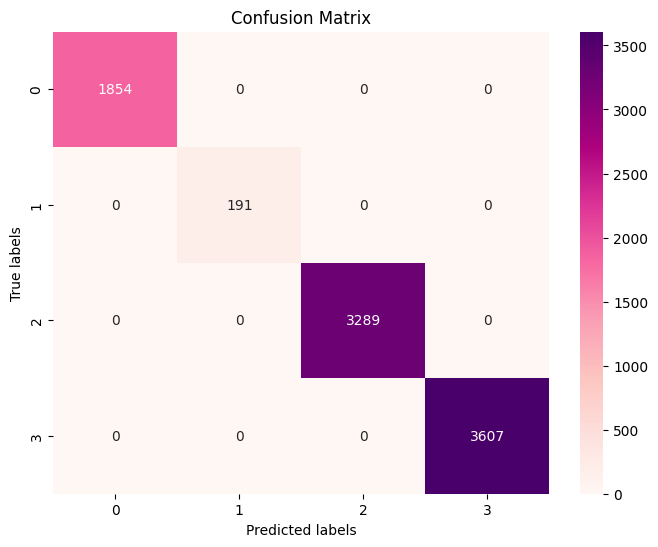

In [212]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='RdPu')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()